# Nick Juliano
# Computational Physics | Homework 08

## Problem:

Any mass can lead to a gravitational potential in 3-D (x-y-z) space
\begin{equation}
\nabla^2\Phi=4\pi G\rho
\end{equation}
    

We will set G=1 for this problem. 

Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) 
using SOR. Since the problem has symmetry in the Z direction:
\begin{equation}
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
\end{equation}


$x=[0, 100]$ & $y=[0,100]$. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$
at the boundary and $\rho_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2*G*$\mu$*ln(r)+constant. 
Where $\mu$ is its mass per unit length and r is the distance to the line mass. 


## Solution:

To verify that the potential has radial dependence close to $2G\mu ln(r)+constant$, we can use Successive Over-Relaxation, or SOR.

By dividing the 2-dimensional space into a lattice in $x=ndx$ and $y=ndy$, the partial derivatives $\frac{\partial^2\Phi}{\partial^2 x}$  and $\frac{\partial^2\Phi}{\partial^2y}$ can be expressed using the finite-difference method. 

This involves only a slight adjustment from the code developed and modified in class. The density has the following conditions:

$\rho(x=50,y=50)=1$ & $\rho(x\neq 50, y\neq 50)=0$   

This represents an infinitly long line of density $\rho$ along the $z$ axis at $x=50$ and $y=50$ for which we can solve the potential 

Initializing
iteration: 0
iteration: 100
maxerr < 1.0e-3 at iteration 142


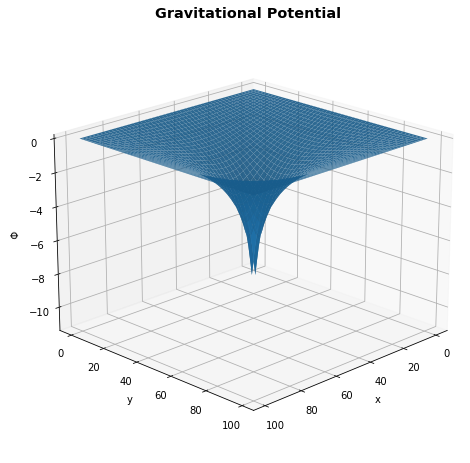

In [42]:
%matplotlib inline
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

print("Initializing")

omg        = 1.95                         # correction parameter
h          = 1                           # dx and dy
G          = 1                           # Gravitational Constant
Nmax       = 100                         # Maximum x~i and y~j space
Niter      = 3000                        # number of iterations
V          = np.zeros((Nmax, Nmax), float)  # initialized potential at i and j
rho        = np.zeros((Nmax, Nmax), float)  # initialized density at i and j
rho[49,49] = 1                          # initialized infinite line mass at x=50, y=50

for iter in range(Niter):                                  
    if iter%100 == 0: print('iteration: ' +str(iter))
    maxerr=0.
    for i in range(1, Nmax-1):
        for j in range(1,Nmax-1): 
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1]-(4*np.pi*h*h*G*rho[i,j]))-V[i,j]
            
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j] + omg * du  
    if(maxerr<1.0e-3):
        print('maxerr < 1.0e-3 at iteration ' +str(iter))
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = np.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          

fig3D = plt.figure(figsize=[12,6])
ax3D = Axes3D(fig3D)
ax3D.plot_surface(X, Y, Z, alpha=0.9)
ax3D.set_title('Gravitational Potential', fontsize='x-large', fontweight='bold')
ax3D.set_xlabel('x')
ax3D.set_ylabel('y')
ax3D.set_zlabel(r'$\Phi$')
ax3D.view_init(20,45)
plt.show()

To verify that the potential has radial dependence, i.e. polar symmetry, close to $2G\mu ln(r)+c$, we can view a plane including the $z$ axis and one orthogonal axis where the line mass crosses the plane.

If we choose to plot the $xz$ plane at $y=50$, express $x$ as $r$, and plot the potential.

If we then compare this plot to that of the analyitcal solution, $\Phi(r) = 2G\mu \ln(r) + c$, we can then verify that our numerical solution has polar symmetry close to the analytical solution.

In [55]:
Z[50,:][49:]

array([-8.04742316, -7.18940747, -6.33126588, -5.65602349, -5.12833185,
       -4.70322594, -4.34982327, -4.04827077, -3.78569015, -3.5533333 ,
       -3.34493098, -3.1560973 , -2.98348677, -2.82441377, -2.67697727,
       -2.5396427 , -2.41107364, -2.29016186, -2.17598581, -2.0678802 ,
       -1.96515667, -1.86729372, -1.77389518, -1.6844404 , -1.59865314,
       -1.51613265, -1.43661303, -1.35988834, -1.28564469, -1.21377727,
       -1.14402302, -1.07625981, -1.0102657 , -0.94595095, -0.88313488,
       -0.8217282 , -0.76159232, -0.70263427, -0.64471722, -0.58777284,
       -0.53168814, -0.47639203, -0.42176615, -0.36776367, -0.31426363,
       -0.26121865, -0.20852618, -0.15615025, -0.10397495, -0.05195225,
        0.        ])

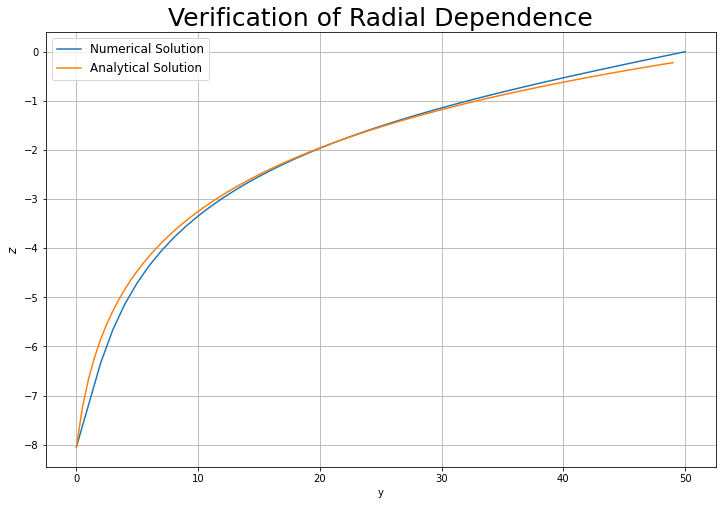

In [65]:
X_an = np.linspace(1, 50, 100)

def radial(r,c,G):
    return 2*G*np.log(r) + c 

Z_an = radial(X_an , Z[50][49], G)

plt.figure(figsize=[12, 8])
plt.title('Verification of Radial Dependence', fontsize=25)
plt.xlabel("y")
plt.ylabel('$z$', fontsize='large')
plt.plot(X[50][49:]-49,Z[50,:][49:], label='Numerical Solution')
plt.plot(X_an-1, Z_an, label='Analytical Solution')
plt.legend(loc="best", fontsize='large')
plt.grid()
plt.show()

We can justify our claim of radial dependence by comparing the two solutions above.